# <span style="color:#F72585"><center>Modelo de regresión lineales generalizados</center></span>



<figure>
<center>
<img src="../Imagenes/ruleta.jpg" width="600" height="600" align="center" /> 
</center>   
</figure>

<a href="https://commons.wikimedia.org/wiki/File:13-02-27-spielbank-wiesbaden-by-RalfR-093.jpg">Ralf Roletschek</a>, <a href="https://creativecommons.org/licenses/by-sa/3.0">CC BY-SA 3.0</a>, via Wikimedia Commons

## <span style="color:#4361EE">Referencias</span>

1. [Dobson y Baernett, An introduction oto Generalizer Linear Modesl](http://library.lol/main/472B57FA461867F6CFB4334BFED60010)

## <span style="color:#4361EE">Introducción</span>

El proceso de modelación estadísitica clásicamente incluye los siguientes pasos:

1. Especificar los modelos en dos partes: ecuaciones que relacionan la respuesta con variables exploratorias y la distribución de probabilidad de la   variable respuesta.
1. Estimar los parámetros usados en los modelos.
1. Chequear que tan bien los modelos ajustan a los datos reales.
1. Hacer inferecnias; Por ejemplo calculanod intervalos de confianza o de credibilidad, pruebas de hipótesis acerca de los patámetros y de los modelos.

## <span style="color:#4361EE">Distribuciones relacionadas con la distribución  Normal o Gaussiana</span> 

### <span style="color:#4CC9F0">Distribución Normal</span>

Si una variable aleatoria $Y$ tiene distribuición normal, con media $\mu$ y varianza $\sigma^2$, su función de densidad d eprobabilidad es dada por

$$
f(y|\mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \text{exp} \left[-\frac{1}{2} \left(\frac{(x-\mu)}{\sigma} \right)^2 \right].
$$

Escribimos $Y\sim N(\mu,\sigma^2)$. Si $\mu=0$ y $\sigma^2=1$ se llama distribución normal estándar.

### <span style="color:#4CC9F0">Distribución Normal Multivariada</span>

Si $Y_i\sim N(\mu_i, \sigma_i^2)$ para $i=1,\ldots, n$ y tal que

$$
cov(Y_i, Y_j) = \rho_{ij}\sigma_i\sigma_j
$$

en donde $\rho_{ij}$ es el coeficiente de correlación ente $Y_i$ y $Y_j$. Entonces la distribución conjunta de las $Y_i$'s es normal Multivariada con media $\boldsymbol{\mu} = (\mu_1,\ldots, \mu_n)$ y matriz de covarianza $\mathbf{V}$. Lo elemento diagonales de $\mathbf{V}$  son $\sigma_i^2$ y  los elementos no diagonales $ij$ son $\rho_{ij}\sigma_i\sigma_j$. Escribimos $Y= Y_1, \ldots, Y_n$ y además $Y \sim N(\boldsymbol{\mu}, \mathbf{V})$.

#### <span style="color:#4CC9F0">Graficos de muestras de distribuciones normal Multivariadas</span>

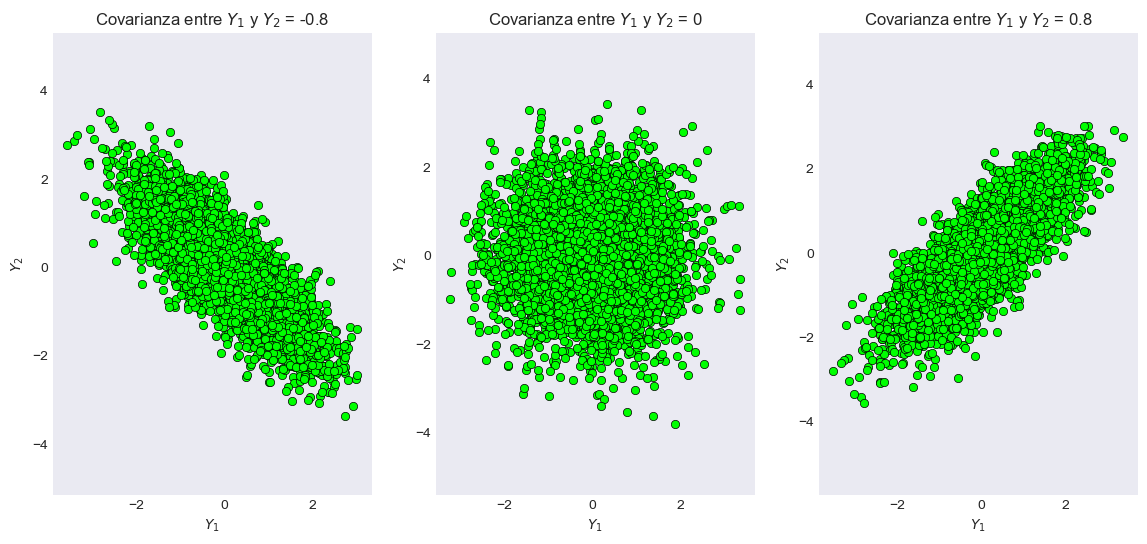

In [6]:
# librerías
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
 
 
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize']=14,6
 
# raíz para valores aleatorios
random_seed=1000
 
# lista de varianzas
# valores de covariazna
cov_val = [-0.8, 0, 0.8]
 
# configura media d ela distribución
# be at (0,0)
mean = np.array([0,0])
 
# Itera sobre diferentes matrices de covarianza
for idx, val in enumerate(cov_val):
    plt.subplot(1,3,idx+1)
     
    # Incializa la matriz de covarianza
    cov = np.array([[1, val], [val, 1]])
     
    # Generala distribución Gaussiana bivariada
    # con medi y matriz de covarianza dadas
    distr = multivariate_normal(cov = cov, mean = mean,
                                seed = random_seed)
     
    # Genera 5000 muestras d ela distribución
    data = distr.rvs(size = 5000)
     
    # Dibuja las muestras genradas
    plt.plot(data[:,0],data[:,1], 'o', c='lime',
             markeredgewidth = 0.5,
             markeredgecolor = 'black')
    plt.title(f'Covarianza entre $Y_1$ y $Y_2$ = {val}')
    plt.xlabel('$Y_1$')
    plt.ylabel('$Y_2$')
    plt.axis('equal')
     
plt.show()

#### <span style="color:#4CC9F0">Graficos de densidades de  distribuciones normal Multivariadas</span>

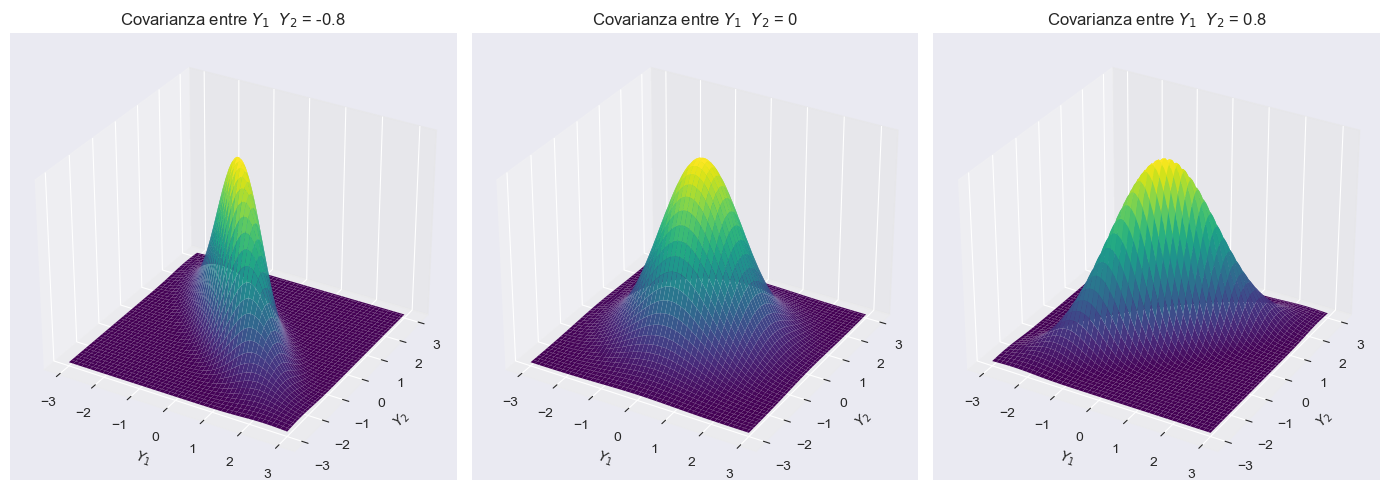

In [7]:
# librerías
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
 
 
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize']=14,6
fig = plt.figure()
 
# Incializa semilla para números aleatorios
random_seed=1000
 
# List containing the variance
# covariance values
cov_val = [-0.8, 0, 0.8]
 
# Configura la media
# to be at (0,0)
mean = np.array([0,0])
 
# almacena valores de la función
pdf_list = []
 
# itera sobre diferentes matrices de covarianza
for idx, val in enumerate(cov_val):
     
    # Inicializa matriz de covarianza
    cov = np.array([[1, val], [val, 1]])
     
    # Genera la densidad Gaussina bivariada
    # con media y covaranza dadas
    distr = multivariate_normal(cov = cov, mean = mean,
                                seed = random_seed)
     
    # Genera una grilla para graficas
    # frontera  3-sigma
    mean_1, mean_2 = mean[0], mean[1]
    sigma_1, sigma_2 = cov[0,0], cov[1,1]
     
    x = np.linspace(-3*sigma_1, 3*sigma_1, num=100)
    y = np.linspace(-3*sigma_2, 3*sigma_2, num=100)
    X, Y = np.meshgrid(x,y)
     
    # Genera la funcipon de densidad
    # para cada punto en la grilla
    pdf = np.zeros(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            pdf[i,j] = distr.pdf([X[i,j], Y[i,j]])
     
    # dibuja lkos valores de la fucnipon de densidad
    key = 131+idx
    ax = fig.add_subplot(key, projection = '3d')
    ax.plot_surface(X, Y, pdf, cmap = 'viridis')
    plt.xlabel("$Y_1$")
    plt.ylabel("$Y_2$")
    plt.title(f'Covarianza entre $Y_1$  $Y_2$ = {val}')
    pdf_list.append(pdf)
    ax.axes.zaxis.set_ticks([])
 
plt.tight_layout()
plt.show()

 #### <span style="color:#4CC9F0">Graficos de contornos de distribuciones normal Multivariadas</span>

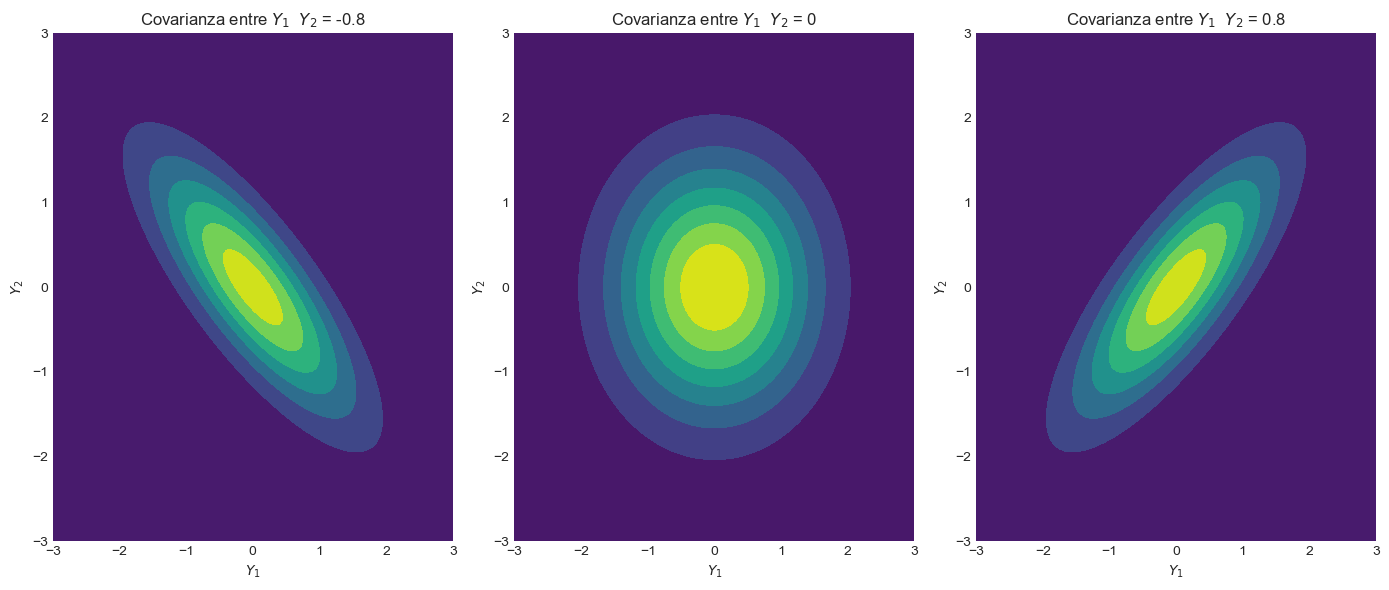

In [8]:
# Dibuja contornos
for idx, val in enumerate(pdf_list):
    plt.subplot(1,3,idx+1)
    plt.contourf(X, Y, val, cmap='viridis')
    plt.xlabel("$Y_1$")
    plt.ylabel("$Y_2$")
    plt.title(f'Covarianza entre $Y_1$  $Y_2$ = {cov_val[idx]}')
plt.tight_layout()
plt.show()

### <span style="color:#4CC9F0">Distribución Chi cuadrado</span>

**La distribución chi-cuadrado con n grados de libertad** es definida como la distribución d la suma de $n$ variables normales elevadas al cuadrad, digamos $Z_i^2$ para $i=1,\ldots, n$. LA distibución se denota $\chi^2(n)$. Si una variable $Y \sim \chi^2(n)$, entonces la esperanza y la variana son respectivamente

$$
\begin{align}
E[Y] &= n\\
Var[Y] &= 2n
\end{align}
$$

Además

$$
Y = \sum_{i=1}^n Z_i^2
$$

El valor $n$ se llama grados de libertad d ela distribución.

La imagen muestra la función de densidad de  la distribución $\chi^2(4)$

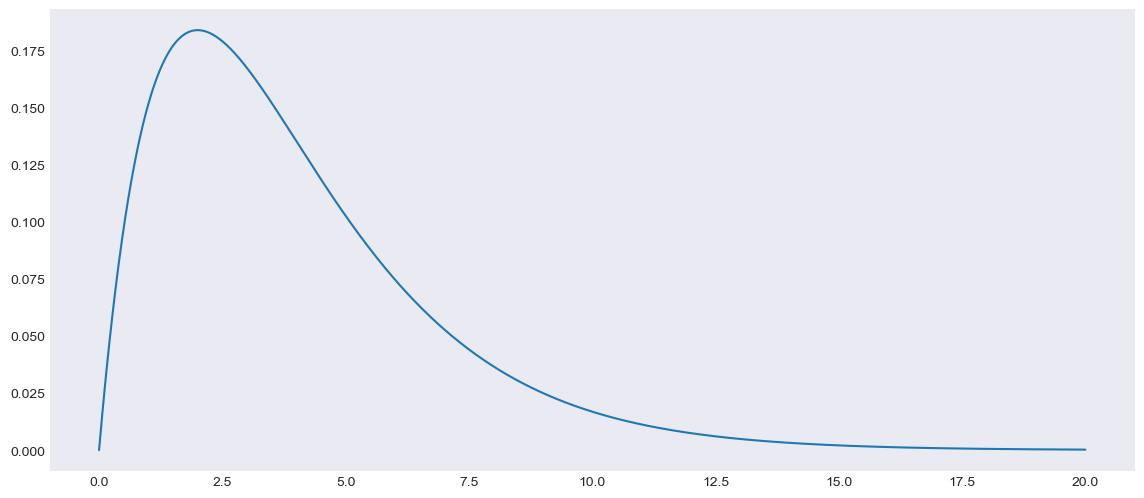

In [10]:
#x-axis ranges from 0 to 20 with .001 steps
from scipy.stats import chi2
x = np.arange(0, 20, 0.001)

#plot Chi-square distribution with 4 degrees of freedom
plt.plot(x, chi2.pdf(x, df=4))
plt.show()

#### <span style="color:#4CC9F0">Propiedad reproductiva de la distribución Chi cuadrado</span>

Si $Y_1 \sim \chi^2(k)$ y $Y_1 \sim \chi^2(m)$, entonces

$$
Y_1 + Y_2 \sim  \chi^2(k+m)
$$

### <span style="color:#4CC9F0">Distribución t-Student</span>

La **distribución t** con $n$ grados de libertad es definida como el cociente de dos variables aleatorias independientes. El numerador tiene distribución normal estándar. El denominador es la raiza cuadrada de una variable aleatoria  $\chi^2$ dividida sobre sus grados de libertad. Asi, si $Z\sim N(0,1)$ y $Y\sim \chi^2(n)$, entonces

$$
T = \frac{Z}{\sqrt{Y/n}}
$$

tiene distribucion $t$ con $n$ grados de libertad  y se denota $T \sim t(n)$

distribución t(2): mean = 0.0, var = inf, skew = nan, kurtosis = nan


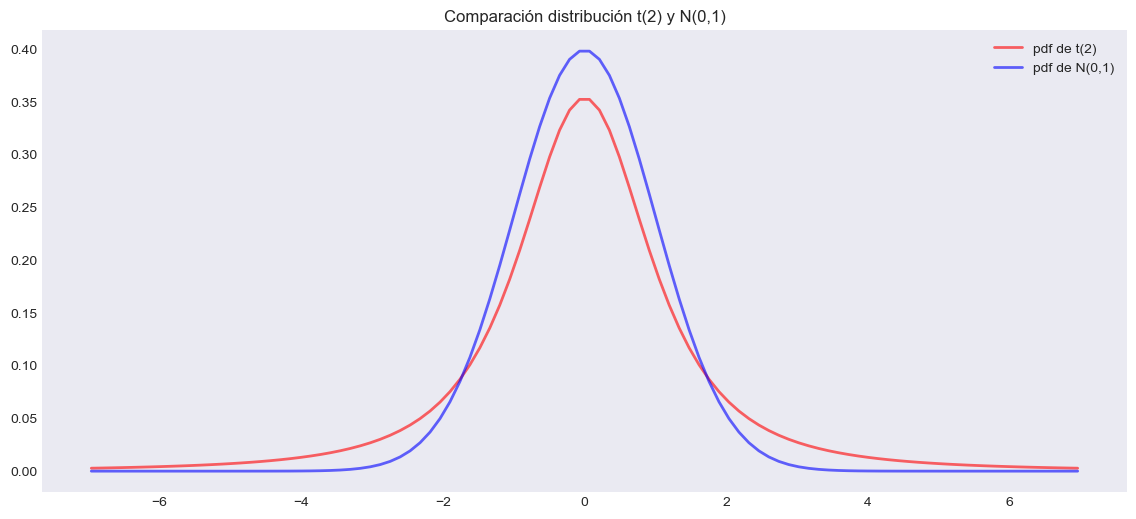

In [31]:
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

df = 2
mean, var, skew, kurt = t.stats(df, moments='mvsk')

print('distribución t(2): mean = {}, var = {}, skew = {}, kurtosis = {}'.format(mean, var, skew, kurt))

x = np.linspace(t.ppf(0.01, df),
                t.ppf(0.99, df), 100)
ax.plot(x, t.pdf(x, df),
       'r-', lw=2, alpha=0.6, label='pdf de t(2)')
ax.plot(x, norm.pdf(x),
       'b', lw=2, alpha=0.6, label='pdf de N(0,1)')
ax.legend()
plt.title('Comparación distribución t(2) y N(0,1)')
plt.show()

## <span style="color:#4361EE">Estimación puntual </span>

Supongamos que se tienen $n$ variables aleatorias independientes $Y=(Y_1, \ldots, Y_n)$. Además supondremos que cada una de las variables aleatorias están indexadas por parámetros $\mu_i$. Es decir $Y_i\sim f(\mu_i)$. Además vamos a suponer que existe una parámetro estructural de tamaño $p+1$, denotado $\boldsymbol{\beta}$, talque existen variables aleatorias $X_i$ con realizacioes $x_{ij}$ tal que

$$
g(\mu_i) = \beta_1 x_{1i} + \beta_2 x_{2i} + \ldots + \beta_{p} x_{pi} + b.
$$

La función $g$ se denomina función de enlace. La ecuación anterior pone en  comunicación el parámetro privilegiado $\mu_i$ con una expresión lineal (componente lineal). La función $g$ es necesaria para permitir que la componenete lineal del modelo puede ser transportado a la esvala del parámetro $\mu_i$.

En el modelo lineal clásico la función de enlace es la funcipin identidad. Es decir, en ese caso se tiene

$$
\mu_i= \beta_1 x_{1i} + \beta_2 x_{2i} + \ldots + \beta_{p} x_{pi} + b.
$$

### <span style="color:#4CC9F0">Función de densidad conjunta</span>

La función de probabilidad conjunta si la variables son independientes es dada por

$$
f(y|\boldsymbol{\beta}, \mathbf{X}) = \prod_{i=1}^n f(y_i|\mu_i) = \prod_{i=1}^n f(y_i|\boldsymbol{\beta}, \mathbf{X})
$$

En donde $\mathbf{X}$ es l a matriz completa de observaciones, que se denomina matriz de diseño, que para efectos prácticos se considera constante. Las columnas de la matriz de diseño representan a las variables explicativas. 

### <span style="color:#4CC9F0">Función de verosimilitud</span>

Si asumimos un distribución a priori para   $\boldsymbol{\beta}$, digamos $P(\boldsymbol{\beta}) = 1/K'$ que representan una distribución uniforme, se tiene la distribución posterior de $\boldsymbol{\beta}$ es dada por

$$
L(\boldsymbol{\beta}| y, \mathbf{X}) = \frac{\prod_{i=1}^n f(y_i|\boldsymbol{\beta},\mathbf{X})}{K}, 
$$
en donde $K$ es una constante de normalización que incluye $K'$.

### <span style="color:#4CC9F0">Función de pérdida</span>

Para estimar $\boldsymbol{\beta}$ se definir una función de pérdida dada por

$$
\mathcal{L} (\boldsymbol{\beta}) = - \log L(\boldsymbol{\beta}| y, \mathbf{X}) = - \sum_{i=1}^n \log f(y_i|\boldsymbol{\beta},\mathbf{X}), 
$$

en donde la constante $K$ ha sido omitida.

### <span style="color:#4CC9F0">Gradiente</span>

Haciendo uso de la regla de la cadena se puede calcular el gradiente de la función de pérdida como

$$
\frac{\partial \mathcal{L}}{\partial \boldsymbol{\beta}} = -  \sum_{i=1}^n \frac{\frac{\partial f(y_i|\boldsymbol{\beta},\mathbf{X})}{\partial \mu_i}}{f(y_i|\boldsymbol{\beta},\mathbf{X})} \times \frac{\partial \mu_i}{\boldsymbol{\beta}}
$$